<a href="https://colab.research.google.com/github/meghna2312/KMeans/blob/master/AIProjectKMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project by:
Meghna Ashok
16070122034

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
customers_data = pd.read_csv(r"C:\Users\USER\Desktop\python\clustering-python-master\Customer in Mall clusterng\Mall_Customers.csv")

In [ ]:
customers_data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
customers_data = customers_data.drop('CustomerID', axis=1)

In [ ]:
customers_data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encode = LabelEncoder()
encoded_sex = encode.fit_transform(customers_data.iloc[:, 0])
print(encoded_sex)

[1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0
 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0
 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1]


In [ ]:
customers_data['Genre'] = encoded_sex

In [ ]:
customers_data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [ ]:
customers_data.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca_reducer = PCA(n_components=2)
reduced_data = pca_reducer.fit_transform(customers_data)

PCA produces a matrix that summarizes how our variables all relate to one another. ( When you want to reduce the number of variables, but aren’t able to identify which variables to completely remove from consideration )

In [ ]:
reduced_data.shape

(200, 2)

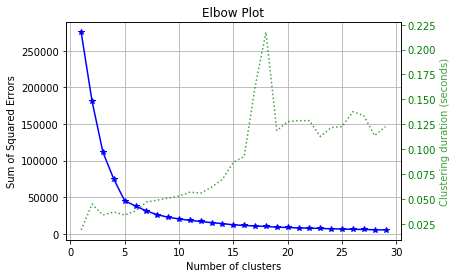

In [ ]:
import scikitplot as skplt
from sklearn.cluster import KMeans
kmeans = KMeans(random_state=1)
skplt.cluster.plot_elbow_curve(kmeans, reduced_data, cluster_ranges=range(1, 30))
plt.show()

From the elbow plot we take no.of clusters=5

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=5)

In [ ]:
cluster = km.fit(reduced_data)

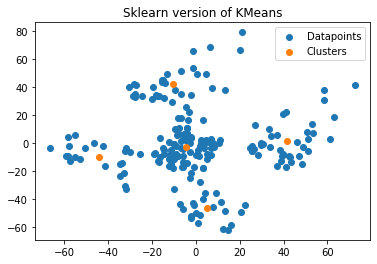

In [ ]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], label='Datapoints')
plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], label='Clusters') #centroids
plt.title("Sklearn version of KMeans")
plt.legend()
plt.show()

## Analysis (Reference for Viva)

In [ ]:
from kmeans_numpy import *

In [ ]:
full_data_kmeans = KMeans_numpy(n_clusters=5)
centroids, clus_data = full_data_kmeans.fit(customers_data.values)

Let's creat table for each centroid so we can easly visualise data in clusters

In [ ]:
cluster_1 = pd.DataFrame(clus_data[0], columns=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
cluster_2 = pd.DataFrame(clus_data[1], columns=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
cluster_3 = pd.DataFrame(clus_data[2], columns=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
cluster_4 = pd.DataFrame(clus_data[3], columns=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
cluster_5 = pd.DataFrame(clus_data[4], columns=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

### Cluster ONE data

In [ ]:
cluster_1

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,23,70,29
1,1,59,71,11
2,1,47,71,9
3,0,25,72,34
4,1,20,73,5
5,0,44,73,7
6,1,19,74,10
7,0,57,75,5
8,1,25,77,12
9,1,48,77,36


In [ ]:
print("Average age for customers in cluster one: {}".format(np.array(cluster_1['Age']).mean()))
print("Average annual income (in thousends) for customers in cluster one: {}".format(np.array(cluster_1['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousends) for customers in cluster one: {}".format(np.array(cluster_1['Annual Income (k$)']).std()))
print("In cluster one we have: {} customers".format(cluster_1.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_1.loc[(cluster_1['Genre'] == 1.0)].shape[0], cluster_1.loc[(cluster_1['Genre'] == 0.0)].shape[0]))

Average age for customers in cluster one: 40.666666666666664
Average annual income (in thousends) for customers in cluster one: 87.75
Deviation of the mean for annual income (in thousends) for customers in cluster one: 16.157858425202548
In cluster one we have: 36 customers
From those customers we have 19 male and 17 female


### Cluster TWO Customers analysis

In [ ]:
cluster_2

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,0,20,16,6
2,0,31,17,40
3,0,35,18,6
4,1,64,19,3
5,1,67,19,14
6,0,58,20,15
7,1,37,20,13
8,0,35,21,35
9,1,52,23,29


In [ ]:
print("Average age for customers in cluster one: {}".format(np.array(cluster_2['Age']).mean()))
print("Average annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_2['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_2['Annual Income (k$)']).std()))
print("In cluster one we have: {} customers".format(cluster_2.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_2.loc[(cluster_2['Genre'] == 1.0)].shape[0], cluster_2.loc[(cluster_2['Genre'] == 0.0)].shape[0]))

Average age for customers in cluster one: 45.21739130434783
Average annual income (in thousands) for customers in cluster one: 26.304347826086957
Deviation of the mean for annual income (in thousands) for customers in cluster one: 7.720299513274676
In cluster one we have: 23 customers
From those customers we have 9 male and 14 female


### Cluster THREE Customers analysis

In [ ]:
cluster_3

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,50,40,55
1,0,27,40,47
2,0,29,40,42
3,0,31,40,42
4,0,49,42,52
...,...,...,...,...
72,1,27,67,56
73,0,38,67,40
74,0,40,69,58
75,1,43,71,35


In [ ]:
print("Average age for customers in cluster one: {}".format(np.array(cluster_3['Age']).mean()))
print("Average annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_3['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_3['Annual Income (k$)']).std()))
print("In cluster one we have: {} customers".format(cluster_3.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_3.loc[(cluster_3['Genre'] == 1.0)].shape[0], cluster_3.loc[(cluster_3['Genre'] == 0.0)].shape[0]))

Average age for customers in cluster one: 43.72727272727273
Average annual income (in thousands) for customers in cluster one: 55.48051948051948
Deviation of the mean for annual income (in thousands) for customers in cluster one: 8.685875068418033
In cluster one we have: 77 customers
From those customers we have 31 male and 46 female


### Cluster FOUR Customers analysis

In [ ]:
cluster_4

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,21,15,81
1,0,23,16,77
2,0,22,17,76
3,0,23,18,94
4,0,30,19,72
5,0,35,19,99
6,0,24,20,77
7,1,22,20,79
8,1,20,21,66
9,0,35,23,98


In [ ]:
print("Average age for customers in cluster one: {}".format(np.array(cluster_4['Age']).mean()))
print("Average annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_4['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_4['Annual Income (k$)']).std()))
print("In cluster one we have: {} customers".format(cluster_4.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_4.loc[(cluster_4['Genre'] == 1.0)].shape[0], cluster_4.loc[(cluster_4['Genre'] == 0.0)].shape[0]))

Average age for customers in cluster one: 24.96
Average annual income (in thousands) for customers in cluster one: 28.04
Deviation of the mean for annual income (in thousands) for customers in cluster one: 9.459302299852775
In cluster one we have: 25 customers
From those customers we have 11 male and 14 female


### Cluster FIVE Customers analysis

In [ ]:
cluster_5

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,39,69,91
1,0,31,70,77
2,1,40,71,95
3,1,38,71,75
4,1,39,71,75
5,0,31,72,71
6,0,29,73,88
7,1,32,73,73
8,0,35,74,72
9,1,32,75,93


In [ ]:
print("Average age for customers in cluster one: {}".format(np.array(cluster_5['Age']).mean()))
print("Average annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_5['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_5['Annual Income (k$)']).std()))
print("In cluster one we have: {} customers".format(cluster_5.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_5.loc[(cluster_5['Genre'] == 1.0)].shape[0], cluster_5.loc[(cluster_5['Genre'] == 0.0)].shape[0]))

Average age for customers in cluster one: 32.69230769230769
Average annual income (in thousands) for customers in cluster one: 86.53846153846153
Deviation of the mean for annual income (in thousands) for customers in cluster one: 16.10199247719673
In cluster one we have: 39 customers
From those customers we have 18 male and 21 female


### Conclusion:

Based on the data from clusters we can see that there are 3 clusters with totally different age of customers. Also it is more usual for older people to have bigger sallary which is as well shown in our results.

As we can see in the cluster 2, people around age 40 have the biggest salary. Based on that the most exclusive items should be directly promoted to people in that age. Younger people, around the age of 25, tend to have lower salaries, but as we can see from Cluster 5 there are people around age 28 whose salary is much bigger (almost double). 

Gender to target in this mall is of course: Females. They tend to buy more stuff, so promotions should be directed to them.
